In [1]:
%matplotlib notebook
import pandas as pd
import skdim
import numpy as np

In [2]:
data = pd.read_csv('datasets/arrh2',sep=',')

In [7]:
data

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"Q(Ampl,of channel V6)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","R'(Ampl,of channel V6)","S'(Ampl,of channel V6)","P(Ampl,of channel V6)","T(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",class
0,56,1,165.0,64.0,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172.0,95.0,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175.0,94.0,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190.0,80.0,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169.0,51.0,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,37,0,190.0,85.0,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166.0,68.0,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155.0,55.0,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
450,78,1,160.0,70.0,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [8]:
y_data = data['class']

In [9]:
data_copy = data

In [10]:
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

In [11]:
data_z_norm = z_score(data)

In [12]:
data_z_norm

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"Q(Ampl,of channel V6)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","R'(Ampl,of channel V6)","S'(Ampl,of channel V6)","P(Ampl,of channel V6)","T(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",class
0,0.578671,0.901919,0.085479,-0.280124,-0.515501,0.420303,1.012179,-0.587912,-1.974876,-0.190991,...,0.508280,-0.157797,0.727766,-0.079458,NaN,-0.904573,0.618876,0.079525,0.504315,0.480922
1,0.457213,-1.106294,0.826451,1.833550,3.194376,0.174999,0.562881,0.422385,0.464465,1.371804,...,0.508280,0.130149,-0.470778,-0.079458,NaN,-0.616436,1.531886,-0.520301,1.055848,1.388549
2,0.517942,-1.106294,1.144011,1.765367,0.721125,1.044714,0.383162,0.254002,2.051973,-0.124957,...,0.508280,0.907606,-0.370899,-0.079458,NaN,-0.328298,0.970034,1.131071,1.737152,-0.653612
3,1.732520,-1.106294,2.731809,0.810805,-0.059902,0.576406,-0.215902,0.197875,0.503185,-1.093450,...,0.508280,1.166758,-1.070050,-0.079458,NaN,-1.768985,1.883043,0.449787,1.802039,0.707829
4,-2.032671,-1.106294,0.508892,-1.166503,0.721125,0.264200,-1.384076,0.113683,0.038548,1.613927,...,-0.584864,0.907606,-0.670535,-0.079458,NaN,1.112389,0.689108,-0.431438,0.087962,2.296176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,-0.575178,-1.106294,2.731809,1.151720,0.721125,-0.404811,-0.185948,0.871406,-0.658406,1.151692,...,0.508280,1.886626,-0.071263,-0.079458,NaN,-0.328298,0.829571,1.382850,1.780410,1.388549
448,-0.635907,-1.106294,0.191332,-0.007392,1.241809,0.464904,-0.066136,0.674960,1.006541,-2.612222,...,0.508280,2.088189,-13.554882,-0.079458,NaN,2.841213,-0.153670,-4.704271,-3.388855,-0.426705
449,-0.878822,0.901919,-0.973053,-0.893771,0.265526,-1.096123,0.562881,1.348491,-1.045603,0.447334,...,-0.220483,0.850017,0.378191,-0.079458,NaN,-0.040161,0.829571,0.420166,0.926075,-0.653612
450,1.914706,0.901919,-0.443787,0.128975,-0.645672,-0.627815,-0.096089,-0.896614,-0.464808,-0.124957,...,0.508280,0.389302,-0.171142,-0.079458,NaN,-0.040161,0.267719,0.146172,0.179884,-0.653612


In [13]:
#with pd.option_context("display.max_rows", 1000):
#    display(data.isna().sum())

In [14]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [15]:
#data_z_norm

In [16]:
data_z_norm=data_z_norm.drop(columns=['S\'(Ampl,of channel V6)']) 

In [17]:
data_z_norm=data_z_norm.drop(columns=['S\'(Ampl,of channel DI)']) 

In [18]:
data_z_norm=data_z_norm.drop(columns=['S\'(Ampl,of channel AVL)']) 

In [19]:
data_z_norm=data_z_norm.drop(columns=['S\'(Ampl,of channel V5)']) 

In [20]:
#fit an estimator of global intrinsic dimension (gid)
danco = skdim.id.DANCo().fit(data_z_norm)
#fit an estimator of local intrinsic dimension (lid): local estimators assume input data comes from a local data neighborhood
fishers = skdim.id.FisherS().fit(data_z_norm)
#fit a global or local estimator in k-nearest-neighborhoods of each point:
#lpca_pw = skdim.asPointwise(data = data_z_norm,
                            #class_instance = skdim.lid.lPCA(),
                            #n_neighbors = 46,
                            #n_jobs = 1)

#get estimated intrinsic dimension
print(danco.dimension_, fishers.dimension_)#, np.mean(lpca_pw)

10.971822453148592 12.426484337309985


In [21]:
import scipy.stats
import matplotlib.pyplot as plt

import elpigraph

from clintraj_qi import *
from clintraj_optiscale import *
from clintraj_eltree import *
from clintraj_util import *

In [22]:
quantify_nans(data_z_norm)

Missing values 0 (0.0%)
Number of complete rows: 452 (100.0%)


In [23]:
variable_types, binary, continuous, ordinal = detect_variable_type(data_z_norm,10,verbose=False)

In [24]:
print(variable_types, binary, continuous, ordinal)

['BINARY', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'ORDINAL', 'BINARY', 'CONTINUOUS', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'ORDINAL', 'ORDINAL', 'CONTINUOUS', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'ORDINAL', 'CONTINUOUS', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'ORDINAL', 'CONTINUOUS', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'ORDINAL', 'BINARY', 'CONTINUOUS', 'BINARY', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'ORDINAL', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'CONTINUOUS', 'ORDINAL', 'CONTINUOUS', 'OR

In [25]:
dfq,replacement_info = quantify_dataframe_univariate(data_z_norm,variable_types)

Matrix shape: (452, 275)
Effective linear dimension 31


<IPython.core.display.Javascript object>


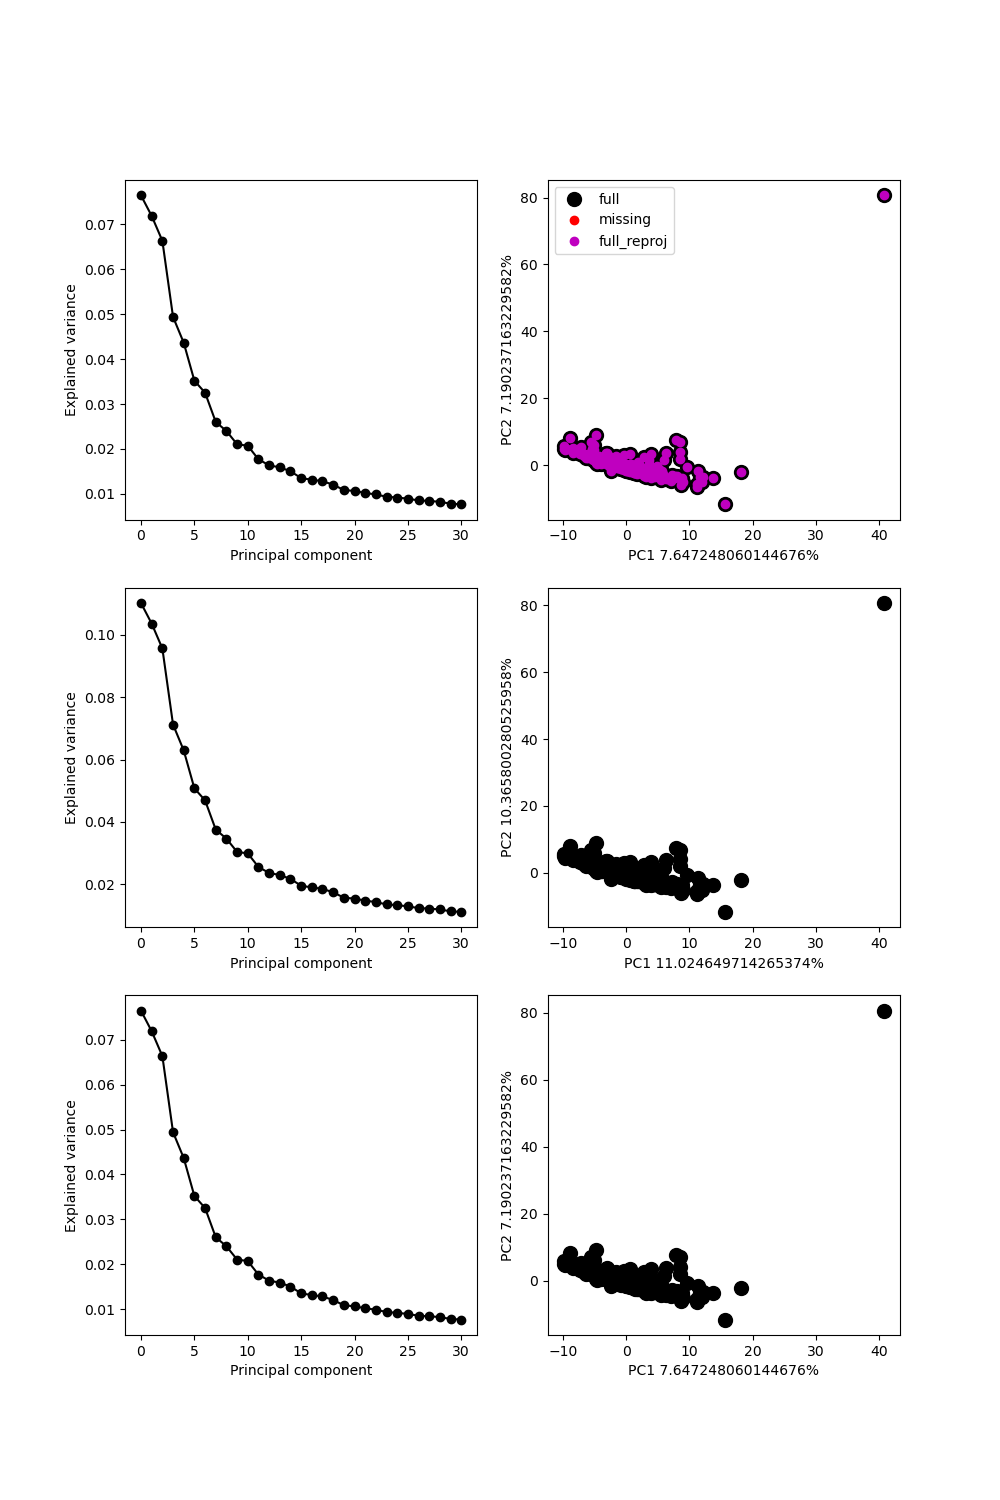

Full matrix shape (452, 275)


In [26]:
dfq_imputed = SVDcomplete_imputation_method(dfq, variable_types, verbose=True,num_components=-1)
with open('temp.txt','w') as fid:
    fid.write(replacement_info)

In [27]:
dequant_info = invert_quant_info(load_quantification_info('temp.txt'))
df_imputed = dequantify_table(dfq_imputed,dequant_info)
display(df_imputed)

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"JJ(Ampl,of channel V6)","Q(Ampl,of channel V6)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","R'(Ampl,of channel V6)","P(Ampl,of channel V6)","T(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",class
0,0.578671,0,0.085479,-0.280124,-0.515501,0.420303,1.012179,-0.587912,-1.974876,-0.190991,...,-0.327696,0.508280,-0.157797,0.727766,0,-0.904573,0.618876,0.079525,0.504315,0.480922
1,0.457213,-1,0.826451,1.833550,3.194376,0.174999,0.562881,0.422385,0.464465,1.371804,...,1.991836,0.508280,0.130149,-0.470778,0,-0.616436,1.531886,-0.520301,1.055848,1.388549
2,0.517942,-1,1.144011,1.765367,0.721125,1.044714,0.383162,0.254002,2.051973,-0.124957,...,0.666389,0.508280,0.907606,-0.370899,0,-0.328298,0.970034,1.131071,1.737152,-0.653612
3,1.732520,-1,2.731809,0.810805,-0.059902,0.576406,-0.215902,0.197875,0.503185,-1.093450,...,-0.162015,0.508280,1.166758,-1.070050,0,-1.768985,1.883043,0.449787,1.802039,0.707829
4,-2.032671,-1,0.508892,-1.166503,0.721125,0.264200,-1.384076,0.113683,0.038548,1.613927,...,0.500708,-0.584864,0.907606,-0.670535,0,1.112389,0.689108,-0.431438,0.087962,2.296176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,-0.575178,-1,2.731809,1.151720,0.721125,-0.404811,-0.185948,0.871406,-0.658406,1.151692,...,-0.327696,0.508280,1.886626,-0.071263,0,-0.328298,0.829571,1.382850,1.780410,1.388549
448,-0.635907,-1,0.191332,-0.007392,1.241809,0.464904,-0.066136,0.674960,1.006541,-2.612222,...,2.488879,0.508280,2.088189,-13.554882,0,2.841213,-0.153670,-4.704271,-3.388855,-0.426705
449,-0.878822,0,-0.973053,-0.893771,0.265526,-1.096123,0.562881,1.348491,-1.045603,0.447334,...,0.832070,-0.220483,0.850017,0.378191,0,-0.040161,0.829571,0.420166,0.926075,-0.653612
450,1.914706,0,-0.443787,0.128975,-0.645672,-0.627815,-0.096089,-0.896614,-0.464808,-0.124957,...,0.003666,0.508280,0.389302,-0.171142,0,-0.040161,0.267719,0.146172,0.179884,-0.653612



 Initial Q2: 919.4593792874059
Initial quantification table:
[array([ 0.,  7., 10., 15.]), array([ 0.,  7., 19.]), array([0., 4., 9.]), array([0., 5., 9.]), array([ 0.,  9., 13.]), array([ 0., 10., 13.]), array([0., 8., 9.]), array([ 0.,  2.,  3.,  5.,  6.,  8., 11.]), array([ 0.,  4., 20.]), array([0., 7.]), array([0., 5.]), array([ 0.,  2., 21.]), array([ 0.,  2., 14.]), array([ 0.,  2., 14.]), array([0., 1., 7.]), array([ 0.,  7.,  8., 13.]), array([ 0.,  4., 20.]), array([0., 5.]), array([ 0.,  4., 20.]), array([0., 1., 7.]), array([0., 2., 9.]), array([ 0.,  3., 14.]), array([ 0., 21.]), array([0., 2., 9.]), array([ 0.,  4., 14.]), array([ 0.,  4., 14.]), array([ 0.,  5., 14.]), array([ 0.,  5., 14.]), array([ 0.,  3., 10.]), array([0., 4., 5., 6., 7., 8.]), array([0., 3., 7.]), array([ 0.,  8., 19.]), array([ 0.,  8., 19.]), array([ 0.,  5., 11.]), array([ 0.,  8., 19.]), array([ 0.,  8., 11., 15.]), array([ 0.,  7., 14.]), array([0., 3., 6.]), array([ 0.,  9., 18.]), array([ 0.

<IPython.core.display.Javascript object>


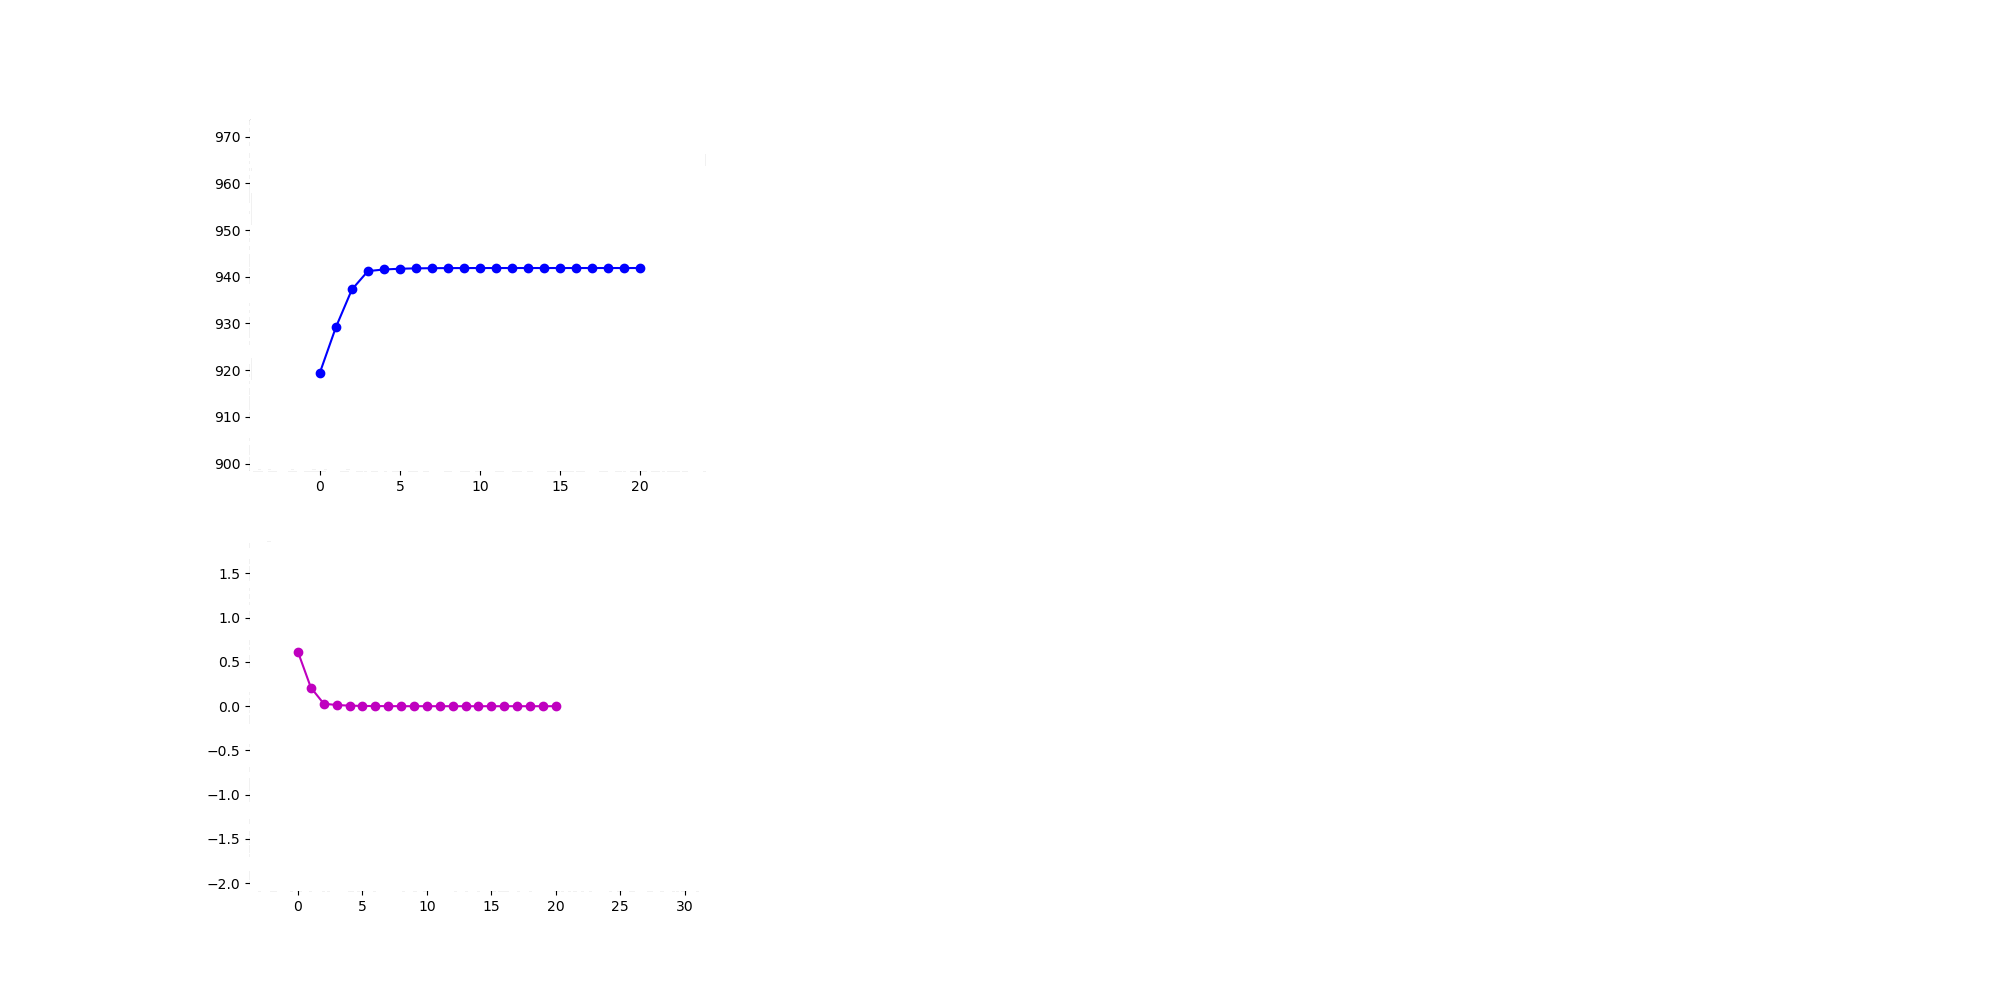


 Q2 after update: 941.862599458397
Final quantification table:
[array([-0.09055479,  7.66412653, 10.13896605, 15.10132512]), array([-0.06204857,  8.46308686, 19.45876794]), array([-0.11398237,  4.88024385,  9.19117835]), array([-0.11476283,  5.71874153,  9.09309573]), array([-0.08122578, 10.21173478, 13.12932096]), array([-0.08151547, 10.91288217, 12.84378254]), array([-0.10572478,  8.94474055,  9.57855902]), array([-0.1438583 ,  3.28382702,  3.91433469,  5.49518251,  6.74033046,
        7.68630089, 10.74921762]), array([-0.05701692,  5.03841428, 20.61920132]), array([-0.13423121,  7.44983221]), array([-0.17208357,  5.8111299 ]), array([-0.0529933 ,  2.80217335, 21.04481157]), array([-0.07300662,  3.11933934, 14.83031637]), array([-0.07278496,  2.9933795 , 14.84353452]), array([-0.13026542,  2.4313467 ,  7.91521394]), array([-0.10290735,  7.92718611,  8.66717739, 13.55084876]), array([-0.05667839,  4.83762588, 20.66765052]), array([-0.19156526,  5.22015325]), array([-0.05667839,  4.83

In [28]:
#df = pd.remove_constant_columns_from_dataframe(df_imputed)
variable_names = [str(s) for s in df_imputed.columns[1:]]
X = df_imputed[df_imputed.columns[1:]].to_numpy()
X_original = X
X_before_scaling = X.copy()
X,cik = optimal_scaling(X,variable_types,verbose=True,vmax=0.6)

In [29]:
reduced_dimension = 12
X = scipy.stats.zscore(X)
pca = PCA(n_components=X.shape[1],svd_solver='full')
Y = pca.fit_transform(X)
v = pca.components_.T
mean_val = np.mean(X,axis=0)
X = Y[:,0:reduced_dimension]

In [79]:
import elpigraph
nnodes = 50
tree_elpi = elpigraph.computeElasticPrincipalTree(X,nnodes)[0]
# some additional pruning of the graph
prune_the_tree(tree_elpi)
# extend the leafs to reach the extreme data points
tree_extended = ExtendLeaves_modified(X, tree_elpi, Mode = "QuantDists", ControlPar = .5, DoSA = False)

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
12 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  50  nodes on  452  points and  12  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1|0|0|0|0|2|6||50	58.905	50	49	22	6	0	0	48.0113	47.2698	0.6431	0.6486	10.7616	0.1322	6.608	330.4015	0


4.577  seconds elapsed
Removed 14 vertices and 14 edges


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

<IPython.core.display.Javascript object>


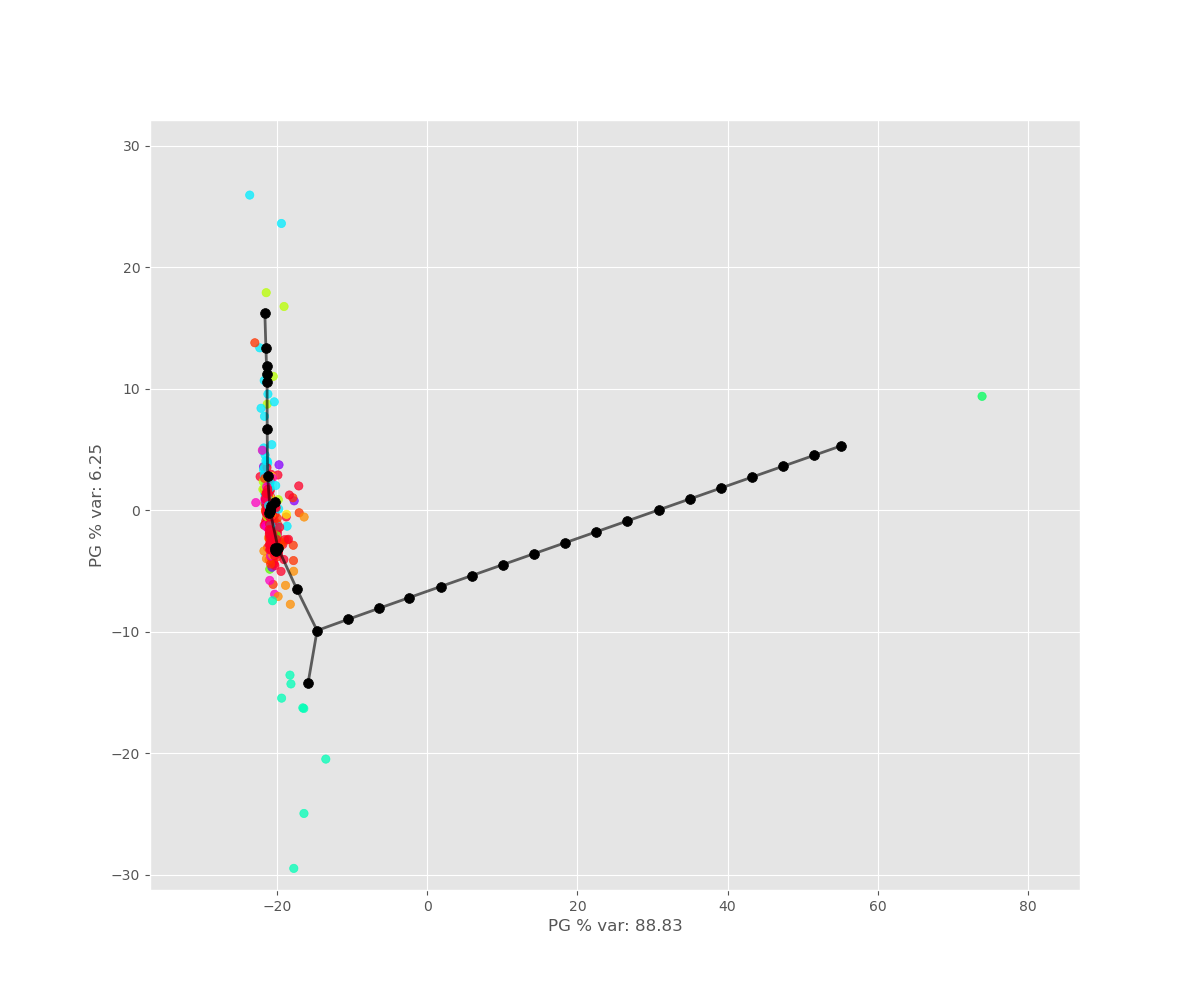

In [71]:
from elpigraph.plot import ModifiedPlotPG

ModifiedPlotPG(X, tree_elpi, X_color=y_data, X_alpha = 0.75)

<IPython.core.display.Javascript object>


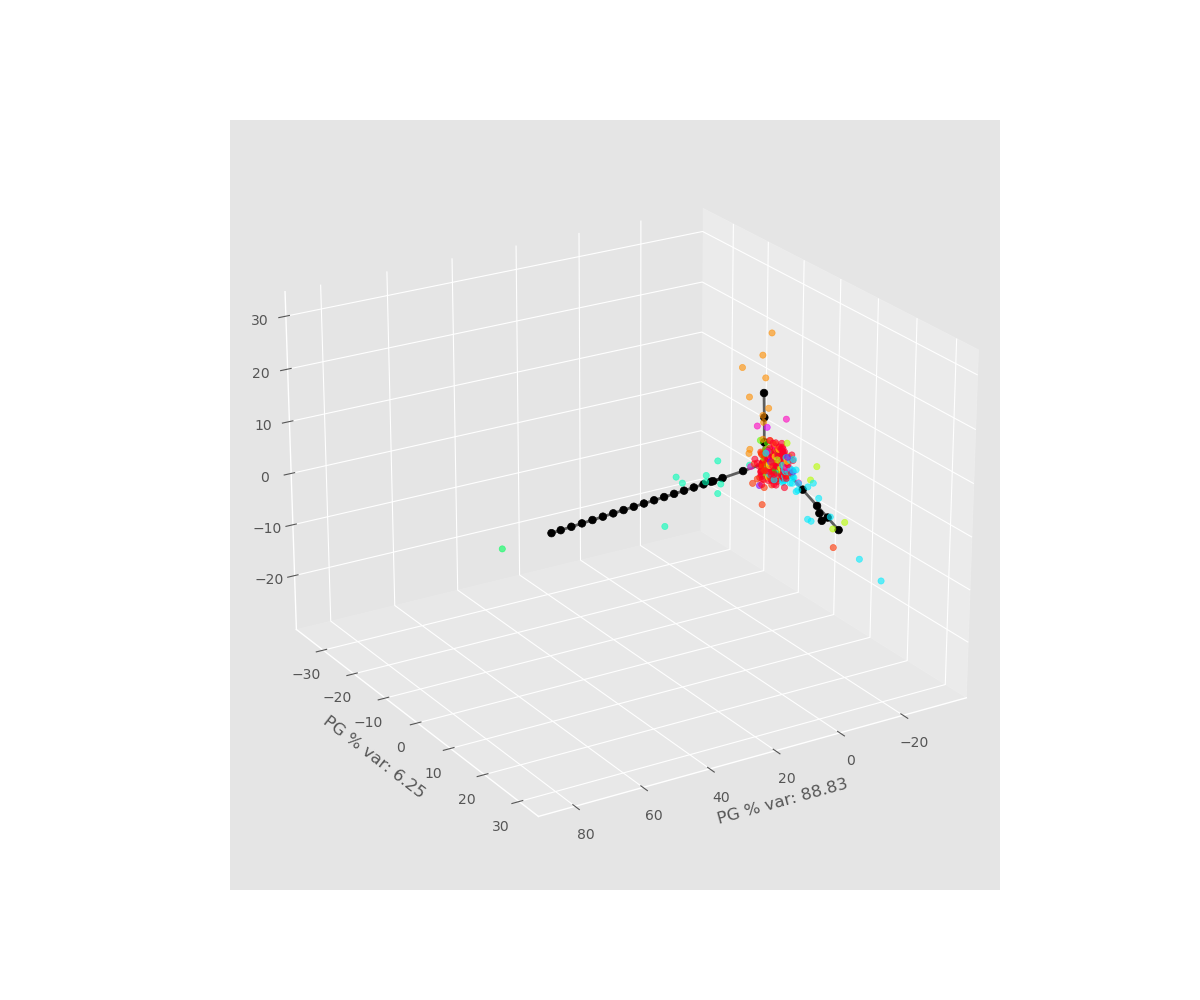

In [70]:
ModifiedPlotPG(X, tree_elpi, label_data=None, X_color=y_data, X_alpha=0.6, node_size=30, node_alpha=1, DimToPlot=[0, 1, 2])

In [47]:
from random import randint
colors = []

for i in range(452):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

<IPython.core.display.Javascript object>


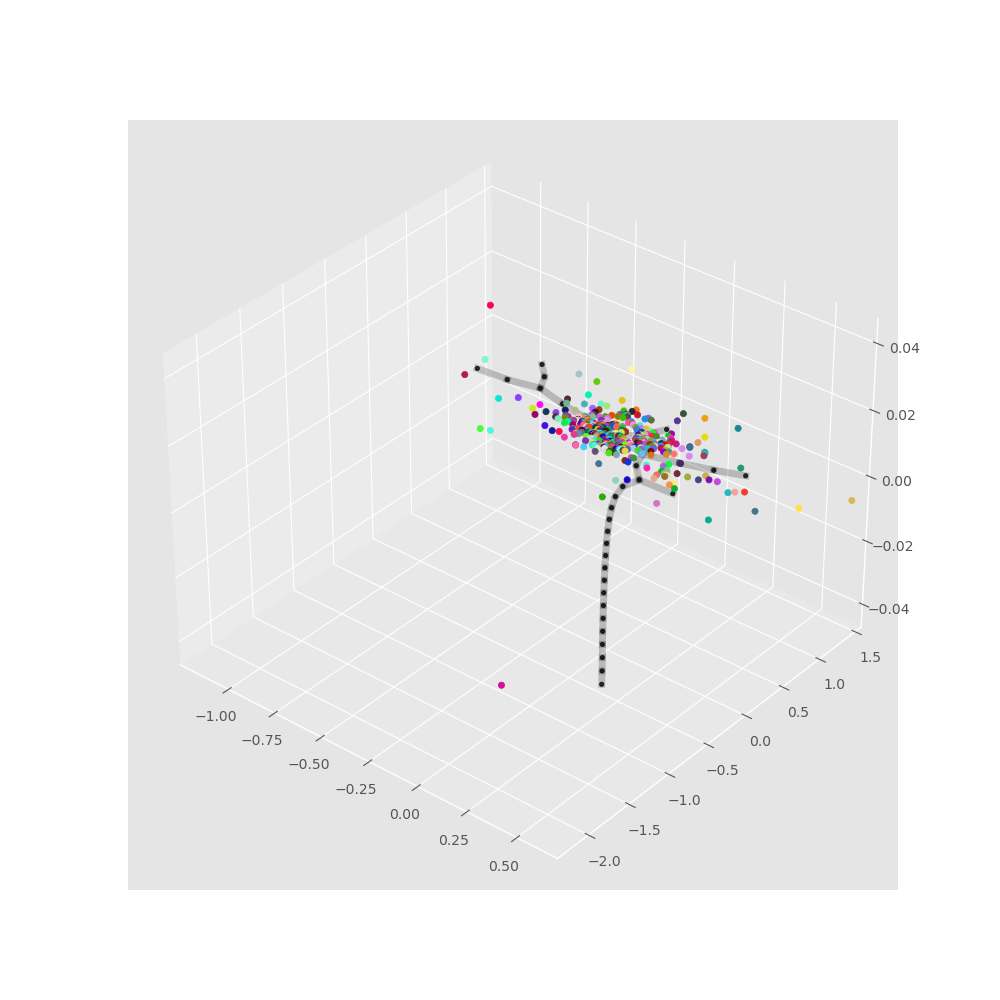

Partitioning the data...
Projecting data points onto the graph...
Producing graph layout...
Calculating scatter aroung the tree...


In [76]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
visualize_eltree_with_data(tree_elpi, X, data_z_norm, v, mean_val, colors, list(data_z_norm.columns), 
                           verbose=True)
plt.show()

In [ ]:
# paritioning the data by tree branches
vec_labels_by_branches = partition_data_by_tree_branches(X,tree_elpi)
print(len(set(vec_labels_by_branches)),'labels generated')
# paritioning the data by proximity to nodes
nodep = tree_elpi['NodePositions']
partition, dists = elpigraph.src.core.PartitionData(X = X, NodePositions = nodep, 
                                                    SquaredX = np.sum(X**2,axis=1,keepdims=1),
                                                    MaxBlockSize = 100000000, TrimmingRadius = np.inf
                                                    )
partition_by_node = np.zeros(len(partition))
for i,p in enumerate(partition):
    partition_by_node[i] = p[0]

<IPython.core.display.Javascript object>


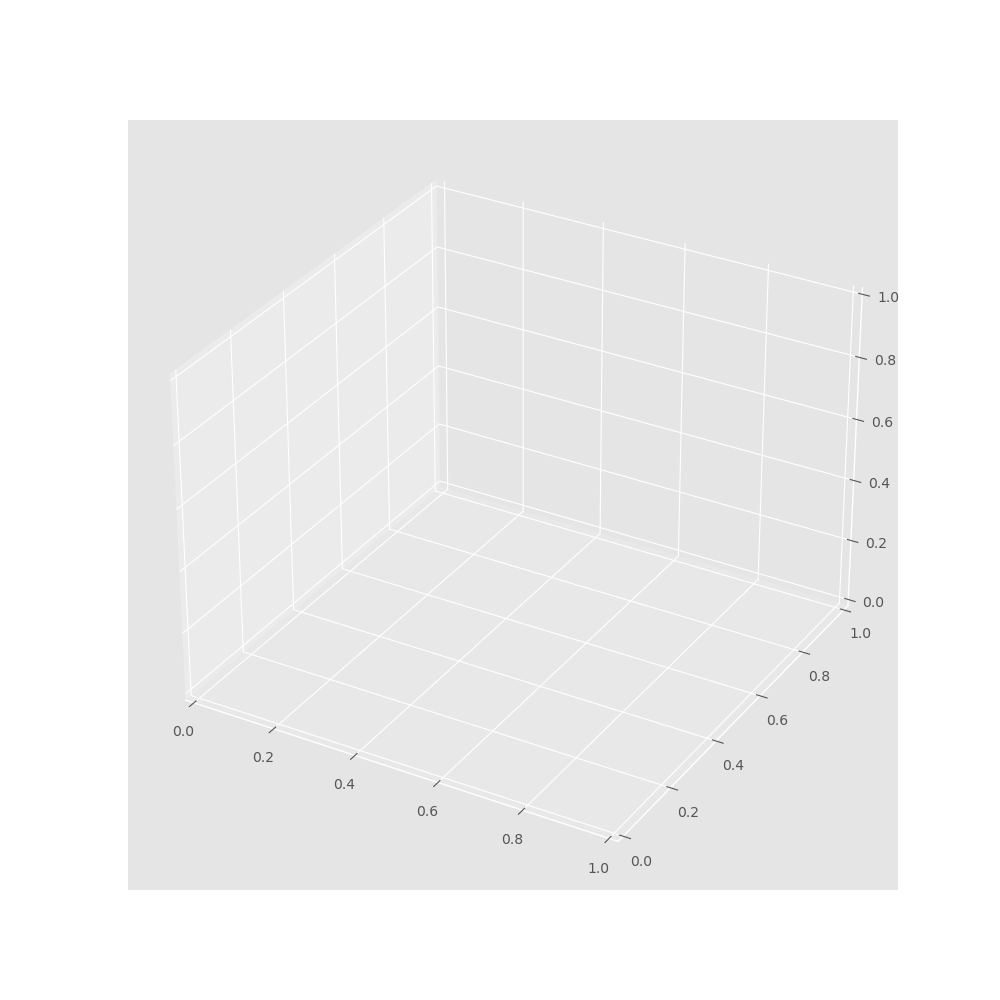

NameError: name 'vec_labels_by_branches' is not defined

In [78]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

visualize_eltree_with_data(tree_elpi, X, data_z_norm, v, mean_val, 'k', list(data_z_norm.columns),
                          Color_by_partitioning = True, visualize_partition = vec_labels_by_branches)
plt.show()